#**HOMEWORK 1: BLUE BIKE TRIP DURATION PREDICTION (Total: / 25 points)**

# *Names: (Student One, Student Two)*

Make sure that you answer the four questions provided at the front of the notebook (edit the XXX response sections to provide your answers). You probably want to answer these last, after you finish the hands-on portion of the assignment. 

#**Answers to Written Questions (10 points)**

**Question 1: What features did you opt to keep, and which did you discard? Why? (2.5 points)**

Features to keep: tripduration  start station name	start station latitude	start station longitude	end station name	end station latitude	end station longitude	usertype	birth year	gender

Features to discard: 	start station id	end station id  bikeid		starttime	stoptime	start station name      end station name

Reasons: We don't need the id of start station and end station as using the latitude and longtitude is enough to identify a station. Plus, considering if all bikes are of equal quality and taken care of, I won't include bike id. 

**Question 2: What transformations did you apply to the data, in terms of pre-procesing? Why? What feature engineering can you do here to help the model along? (2.5 points)**


Preprocessing: one hot encode the "usertype" column

Feature engineering with geospatial data. The model will try to figure out the time to get to the station by the location (latitude and longtitude) and by the user's characteristics. I want to boost the model performance by having more data for the location of stations by feature engineering. 

**Question 3: What activation functions did you consider for the output layer? Which did you rule out? Why? (2.5 points)**

Ruling out the classification activation functions, I have relu and selu. Basically I tried both of them and relu did better.

**Question 4: What steps did you take to ensure the robustness of your model's performance, e.g., to avoid overfitting, or compatibility with new samples of data? (2.5 points)**

I tried dropout layers, then batch normalizations before every layer, and then L2 normalization

#**Implement Neural Network (12 Points)**

Modify the placeholder codeblocks below to implement your neural network. 

##*Import and Pre-process Data*

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [8]:

# No need to change this; this is the dataset I'm providing to you for training.
bluebikes = pd.read_csv('https://raw.githubusercontent.com/gburtch/BA865-2022/main/Week%203/datasets/bluebikes_sample.csv')

bluebikes.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1584,09:36.7,36:00.9,442,Hyde Park Ave at Walk Hill St,42.296067,-71.116012,122,Burlington Ave at Brookline Ave,42.345733,-71.100694,4587,Subscriber,1967,1
1,894,40:48.2,55:43.0,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,144,Rogers St & Land Blvd,42.365758,-71.076994,2340,Subscriber,1994,1
2,973,58:05.4,14:18.4,57,Columbus Ave at Massachusetts Ave,42.340543,-71.081388,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,2910,Subscriber,1994,1
3,606,46:45.0,56:51.4,149,175 N Harvard St,42.363796,-71.129164,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,4526,Subscriber,1992,1
4,428,49:27.9,56:36.7,426,Surface Rd at Summer St,42.352946,-71.056564,420,Charles St at Pinckney St,42.358725,-71.070795,3780,Subscriber,1989,1


### One hot encode "usertype" column

In [9]:
bluebikes.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1584,09:36.7,36:00.9,442,Hyde Park Ave at Walk Hill St,42.296067,-71.116012,122,Burlington Ave at Brookline Ave,42.345733,-71.100694,4587,Subscriber,1967,1
1,894,40:48.2,55:43.0,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,144,Rogers St & Land Blvd,42.365758,-71.076994,2340,Subscriber,1994,1
2,973,58:05.4,14:18.4,57,Columbus Ave at Massachusetts Ave,42.340543,-71.081388,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,2910,Subscriber,1994,1
3,606,46:45.0,56:51.4,149,175 N Harvard St,42.363796,-71.129164,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,4526,Subscriber,1992,1
4,428,49:27.9,56:36.7,426,Surface Rd at Summer St,42.352946,-71.056564,420,Charles St at Pinckney St,42.358725,-71.070795,3780,Subscriber,1989,1


### Prepare the train and test dataset

In [10]:
def processData(dataset):

    # One hot encode "usertype" column
    onehot = pd.get_dummies(dataset['usertype'])
    dataset = dataset.join(onehot)
    dataset.drop('Customer', axis = 1, inplace = True)
    dataset.drop('usertype', axis = 1, inplace= True)


    #Calculate Harvesine distance
    # lon1 = radians(lon1)
    # lon2 = radians(lon2)
    # lat1 = radians(lat1)
    # lat2 = radians(lat2)

    lon1 = np.radians(dataset['start station longitude'])
    lon2 = np.radians(dataset['end station longitude'])
    lat1 = np.radians(dataset['start station latitude'])
    lat2 = np.radians(dataset['end station latitude'])
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Radius of earth in kilometers. Use 3956 for miles
    r = 3956
    # calculate the result
    c * r
    dataset['harvesine'] = c * r

    # Manhattan distance
    # Calculate the difference in degrees longitude and latitude between start and stop stations.
    abs_diff_longitude = (dataset['end station longitude'] - dataset['start station longitude']).abs()
    abs_diff_latitude = (dataset['end station latitude'] - dataset['start station latitude']).abs()
    #the latitude distance
    a_lat = (np.sin(abs_diff_latitude/2))**2
    c_lat = 2 * np.arctan2( np.sqrt(a_lat), np.sqrt(1-a_lat) )
    r = 3956
    latitudeDistance = r * c_lat # R is the Earth's radius, 6,371km or 3956 miles
    # the longitude distance
    a_lon = (np.sin(abs_diff_longitude/2))**2
    c_lon = 2 * np.arctan2( np.sqrt(a), np.sqrt(1-a_lon) )
    r = 3956
    longitudeDistance = r * c_lon # R is the Earth's radius, 6,371km or 3956 miles
    dataset['manhattan'] = abs(latitudeDistance) + abs(longitudeDistance)

    # Bearing distance
    r = 3956  # Mean radius of Earth
    diff_lng = np.radians(dataset['end station longitude'] - dataset['start station longitude'])
    lat1, lng1, lat2, lng2 = map(np.radians, (dataset['start station latitude'], dataset['start station longitude'], dataset['end station latitude'], dataset['end station longitude']))
    y = np.sin(diff_lng) * np.cos(dataset['end station latitude'])
    x = np.cos(dataset['start station latitude']) * np.sin(dataset['end station latitude']) - np.sin(dataset['start station latitude']) * np.cos(dataset['end station latitude']) * np.cos(diff_lng)
    dataset['bearing'] = np.degrees(np.arctan2(y, x))


    # Turn to numpy array
    predictors_list = ['start station latitude', 'start station longitude', 'end station latitude', 'end station longitude', 'Subscriber', 'birth year', 'gender', 'harvesine', 'manhattan', 'bearing']
    labels_list = ['tripduration']
    predictors_dataset = dataset[predictors_list]
    labels_dataset = dataset[labels_list]
    predictors = predictors_dataset.to_numpy()
    labels = labels_dataset.to_numpy()
    labels = np.asarray(labels_dataset).astype('float32')

    

    return predictors, labels



In [11]:
predictors, labels = processData(bluebikes)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(predictors, labels, test_size=0.3, random_state=865)


#*Specify Your Neural Network Architecture, Process Your Sample*

Setting up the Neural Network; you should evaluate your model's loss in terms of MAE (I'm going to do the same).

In [13]:
!pip install tensorflow


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        tf.keras.layers.BatchNormalization(),
        layers.Dense(4500, kernel_regularizer = 'l2', activation="selu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(2250, kernel_regularizer = 'l2', activation="selu"),
        tf.keras.layers.Dropout(0.5),
    ])
    model.compile(optimizer="adam", loss="mae", metrics=["mae"])
    return model

num_epochs = 19
batch_sizes = 90

model = build_model()
history = model.fit(predictors, labels, epochs= num_epochs, batch_size=batch_sizes, validation_data=(X_test, y_test))
# mae_history = history.history['val_mae']
# all_mae_histories.append(mae_history)

Epoch 1/19
100/100 [==============================] - 19s 168ms/step - loss: 848.9150 - mae: 842.3271 - val_loss: 836.9080 - val_mae: 828.6481
Epoch 2/19
100/100 [==============================] - 18s 178ms/step - loss: 838.9729 - mae: 827.5864 - val_loss: 875.8288 - val_mae: 861.3716
Epoch 3/19
100/100 [==============================] - 17s 173ms/step - loss: 830.2657 - mae: 810.5405 - val_loss: 829.8378 - val_mae: 806.1046
Epoch 4/19
100/100 [==============================] - 17s 167ms/step - loss: 818.1038 - mae: 787.3592 - val_loss: 842.2878 - val_mae: 805.9728
Epoch 5/19
100/100 [==============================] - 17s 171ms/step - loss: 805.2421 - mae: 764.0060 - val_loss: 808.4289 - val_mae: 763.0659
Epoch 6/19
100/100 [==============================] - 16s 163ms/step - loss: 791.7642 - mae: 740.4807 - val_loss: 813.5335 - val_mae: 756.0105
Epoch 7/19
100/100 [==============================] - 15s 154ms/step - loss: 777.8867 - mae: 716.6631 - val_loss: 771.9995 - val_mae: 703.6007

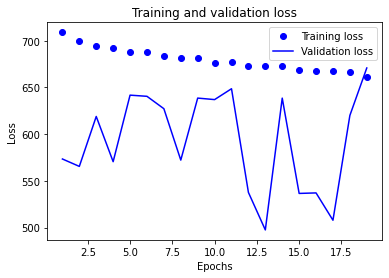

In [23]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot model loss over epochs to undertand its performance.

#*Once You Choose the Final Configuration, Output that Model Here*

In [24]:
model = build_model()
model.fit(predictors,labels,epochs=num_epochs, batch_size=batch_sizes)

Epoch 1/19
100/100 [==============================] - 13s 121ms/step - loss: 707.5128 - mae: 677.8659
Epoch 2/19
100/100 [==============================] - 13s 127ms/step - loss: 699.3215 - mae: 670.9550
Epoch 3/19
100/100 [==============================] - 12s 122ms/step - loss: 693.3113 - mae: 666.1013
Epoch 4/19
100/100 [==============================] - 11s 110ms/step - loss: 691.5896 - mae: 665.4419
Epoch 5/19
100/100 [==============================] - 11s 114ms/step - loss: 687.9712 - mae: 662.7967
Epoch 6/19
100/100 [==============================] - 10s 102ms/step - loss: 688.0800 - mae: 663.8304
Epoch 7/19
100/100 [==============================] - 12s 123ms/step - loss: 682.0169 - mae: 658.5802
Epoch 8/19
100/100 [==============================] - 12s 116ms/step - loss: 683.9538 - mae: 661.2706
Epoch 9/19
100/100 [==============================] - 12s 118ms/step - loss: 679.1388 - mae: 657.1249
Epoch 10/19
100/100 [==============================] - 13s 127ms/step - loss: 678.

Take a look at your model's final structure:

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (90, 4500)                49500     
                                                                 
 dropout_6 (Dropout)         (90, 4500)                0         
                                                                 
 dense_8 (Dense)             (90, 2250)                10127250  
                                                                 
 dropout_7 (Dropout)         (90, 2250)                0         
                                                                 
Total params: 10,176,750
Trainable params: 10,176,750
Non-trainable params: 0
_________________________________________________________________


#**Instructor Code Evaluation** (3 points)

Do not modify this section; this is the code I will use to evaluate that your model is output properly and that it can generate predictions on new test observations it has never seen before. If your model breaks when I feed it the new data, I will deduct marks, so please ensure that your data pre-processing function works properly!

In [ ]:
from google.colab import files
import io
import pandas as pd

# I am going to upload my holdout dataset and pass it to your final model. This data will have the exact same set of columns as the data I gave you to fit your model to.
uploaded = files.upload()
bluebike_holdout = pd.read_csv(io.BytesIO(uploaded['bluebikes_holdout.csv']))

# I'm then going to pre-process it using your data processing function.
holdout_predictors, holdout_labels = processData(bluebike_holdout)

# Then, I'm going to request your model's prediction performance. 
# I expect you should be able to predict trip durations within at least 1000 seconds of ground truth, on average (at worst).
loss_metrics = model.evaluate(holdout_predictors,holdout_labels,verbose=1)